# The Barnsley Fern

https://en.wikipedia.org/wiki/Barnsley_fern


![IMG](https://upload.wikimedia.org/wikipedia/commons/e/ee/Sa-fern.jpg)

_Fern plants at Muir Woods, California; 28 May 2007; Sanjay Ach_ (CC BY-SA 3.0)


The fern is one of the basic examples of **self-similar sets**, i.e. it is a mathematically generated pattern that can be reproducible at any magnification or reduction. Like the Sierpinski triangle, the Barnsley fern shows how graphically beautiful structures can be built from repetitive uses of mathematical formulas with computers. [Michael Barnsley](https://en.wikipedia.org/wiki/Michael_Barnsley)'s 1988 book Fractals Everywhere is based on the course which he taught for undergraduate and graduate students in the School of Mathematics, Georgia Institute of Technology, called Fractal Geometry. Barnsley's work has been a source of inspiration to graphic artists attempting to imitate nature with mathematical models.
[Fractals Everywhere, Second Edition](https://www.sciencedirect.com/book/9780120790616/fractals-everywhere) covers the fundamental approach to fractal geometry through iterated function systems. This 10-chapter text is based on a course called "Fractal Geometry", which has been taught in the School of Mathematics at the Georgia Institute of Technology. After a brief introduction to the subject, this book goes on dealing with the concepts and principles of spaces, contraction mappings, fractal construction, and the chaotic dynamics on fractals. Other chapters discuss fractal dimension and interpolation, the Julia sets, parameter spaces, and the Mandelbrot sets. The remaining chapters examine the measures on fractals and the practical application of recurrent iterated function systems. This book will prove useful to both undergraduate and graduate students from many disciplines, including mathematics, biology, chemistry, physics, psychology, mechanical, electrical, and aerospace engineering, computer science, and geophysical scien

The fern code developed by Barnsley is an example of an iterated function system (IFS) to create a fractal. This follows from the [collage theorem](https://en.wikipedia.org/wiki/Collage_theorem).

### Iterated function system (IFS)

Formally, an **iterated function system** is a finite set of **contraction mappings** (i.e. functions $f$ from $M$ to itself, with the property that there is some $k$, $0\leq k<1$ such that for all $x$ and $y$ in $M$ $d(f(x),f(y))\leq k\,d(x,y)$, where $(M, d)$ is a metric space) on a complete metric space (a metric space M is called **complete** if every Cauchy sequence of points in $M$ has a limit that is also in $M$). 

Symbolically,

$$\{f_{i}:X \rightarrow X\mid i=1,2,\ldots ,N\},\ N\in \mathbb {N}$$

is an **iterated function system** if each $f_{i}$ is a contraction on the complete metric space $X$.

Barnsley's fern uses four **affine transformations** (i.e. geometric transformations that preserves lines and parallelism, but not necessarily distances and angles). The formula for one transformation is the following:


$$
f(x,y) = \left( \begin{array}{cc}
a & b \\
c & d
\end{array} \right)
%
\left( \begin{array}{c}
x \\
y
\end{array} \right)
+
\left( \begin{array}{c}
e \\
f
\end{array} \right)
$$

Barnsley shows the IFS code for his Black Spleenwort fern fractal as a matrix of values shown in a table below (_Fractals Everywhere_, Table III.3, IFS code for a fern).
In the table, the columns "a" through "f" are the coefficients of the equation, and "p" represents the probability factor.


| w	        |  a	 |  b	 |  c	 |  d	  | e	| f    | p	   |    Portion generated              |
| --------- | ------ | ----- | ----- | ------ | --- | ---- | ----- | :-------------------------------- |
|$$f_1$$  	|  0.0   |  0.0	 |  0.0	 |  0.16  |	0.0	| 0.0  | 0.01  |	Stem                           |
|$f_2$	    |  0.85	 |  0.04 | −0.04 |	0.85  |	0.0	| 1.60 | 0.85  |	Successively smaller leaflets  |
|$f_3$   	|  0.20	 | −0.26 |	0.23 |	0.22  |	0.0	| 1.60 | 0.07  |	Largest left-hand leaflet      |
|$f_4$	    | −0.15	 |  0.28 |	0.26 |	0.24  |	0.0	| 0.44 | 0.07  |	Largest right-hand leaflet     |


In [1]:
import matplotlib.pyplot as plt 
from random import randint

In [2]:
%%time

x = [0]
y = [0]

for i in range(0, 200000): 
  
    p = randint(1, 100) 
      
    if p == 1:                                        # Stem  (0.01)
        x.append(0) 
        y.append(0.16*(y[i])) 
         
    if p >= 2 and p <= 86:                            # Successively smaller leaflets  (0.85)
        x.append(0.85*(x[i]) + 0.04*(y[i])) 
        y.append(-0.04*(x[i]) + 0.85*(y[i])+1.6) 
      
    if p >= 87 and p <= 93:                           # Largest left-hand leaflet  (0.07)
        x.append(0.2*(x[i]) - 0.26*(y[i])) 
        y.append(0.23*(x[i]) + 0.22*(y[i])+1.6) 
          
    if p >= 94 and p <= 100:                          # Largest right-hand leaflet (0.07)
        x.append(-0.15*(x[i]) + 0.28*(y[i])) 
        y.append(0.26*(x[i]) + 0.24*(y[i])+0.44)

CPU times: user 134 ms, sys: 0 ns, total: 134 ms
Wall time: 133 ms


**Plotting**

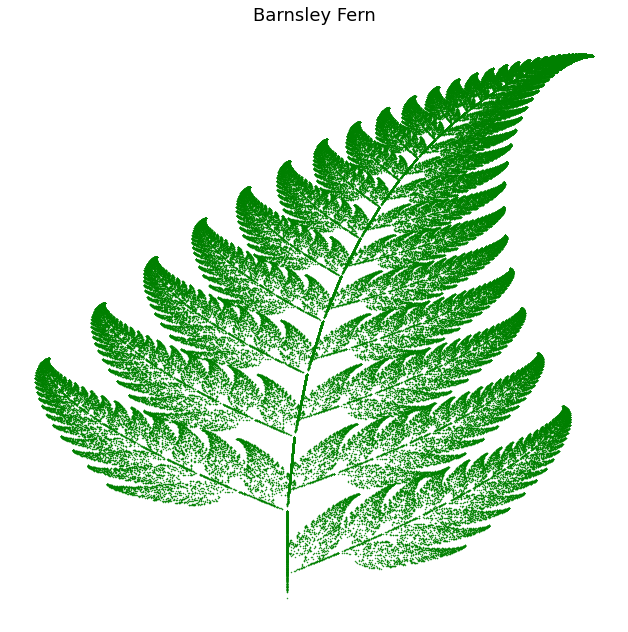

CPU times: user 887 ms, sys: 15.9 ms, total: 903 ms
Wall time: 923 ms


In [3]:
%%time

fig, ax = plt.subplots(1,1,figsize=(11,11))
plt.title('Barnsley Fern', size=18)
plt.scatter(x, y, s = 0.2, c = 'green') 
plt.axis("off")
plt.show()

The attractor of the iterated function system given by the set of "fern functions"
```
f_1(x,y)	=	[0.85 0.04; -0.04 0.85][x; y]+[0.00; 1.60]	  (1)
f_2(x,y)	=	[-0.15 0.28; 0.26 0.24][x; y]+[0.00; 0.44]	  (2)
f_3(x,y)	=	[0.20 -0.26; 0.23 0.22][x; y]+[0.00; 1.60]	  (3)
f_4(x,y)	=	[0.00 0.00; 0.00 0.16][x; y]	                (4)
```


Though Barnsley's fern could in theory be plotted by hand with a pen and graph paper, the number of iterations necessary runs into the tens of thousands, which makes use of a computer practically mandatory. Many different computer models of Barnsley's fern are popular with contemporary mathematicians. As long as math is programmed correctly using Barnsley's matrix of constants, the same fern shape will be produced.

 <img src="https://upload.wikimedia.org/wikipedia/commons/f/f6/Barnsley_Fern_fractals_-_4_states.PNG" width=400 />

The first point drawn is at the origin (x0 = 0, y0 = 0) and then the new points are iteratively computed by randomly applying one of the following four coordinate transformations:

```
ƒ1

xn + 1 = 0
yn + 1 = 0.16 yn.
```
This coordinate transformation is chosen 1% of the time and just maps any point to a point in the first line segment at the base of the stem. This part of the figure is the first to be completed during the course of iterations.

```
ƒ2

xn + 1 = 0.85 xn + 0.04 yn
yn + 1 = −0.04 xn + 0.85 yn + 1.6.
```
This coordinate transformation is chosen 85% of the time and maps any point inside the leaflet represented by the red triangle to a point inside the opposite, smaller leaflet represented by the blue triangle in the figure.

```
ƒ3

xn + 1 = 0.2 xn − 0.26 yn
yn + 1 = 0.23 xn + 0.22 yn + 1.6.
```
This coordinate transformation is chosen 7% of the time and maps any point inside the leaflet (or pinna) represented by the blue triangle to a point inside the alternating corresponding triangle across the stem (it flips it).

```
ƒ4

xn + 1 = −0.15 xn + 0.28 yn
yn + 1 = 0.26 xn + 0.24 yn + 0.44.
```

This coordinate transformation is chosen 7% of the time and maps any point inside the leaflet (or pinna) represented by the blue triangle to a point inside the alternating corresponding triangle across the stem (without flipping it).

The first coordinate transformation draws the stem. The second generates successive copies of the stem and bottom fronds to make the complete fern. The third draws the bottom frond on the left. The fourth draws the bottom frond on the right. The recursive nature of the IFS guarantees that the whole is a larger replica of each frond. Note that the complete fern is within the range −2.1820 < x < 2.6558 and 0 ≤ y < 9.9983.

These affine transformations are contractions. The tip of the fern (which resembles the black spleenwort variety of fern) is the fixed point of $f_1$, and the tips of the lowest two branches are the images of the main tip under $f_2$ and $f_3$ (https://mathworld.wolfram.com/BarnsleysFern.html)

In [4]:
x1 = [0]
y1 = [0]


for i in range(0, 200000): 
  
    p = randint(1, 93) 
      
    if p == 1:                                        # Stem  (0.01)
        x1.append(0) 
        y1.append(0.16*(y1[i])) 
         
    if p >= 2 and p <= 86:                            # Successively smaller leaflets  (0.85)
        x1.append(0.85*(x1[i]) + 0.04*(y1[i])) 
        y1.append(-0.04*(x1[i]) + 0.85*(y1[i])+1.6) 

    if p >= 87 and p <= 93:                           # Largest left-hand leaflet  (0.07)
        x1.append(0.2*(x1[i]) - 0.26*(y1[i])) 
        y1.append(0.23*(x1[i]) + 0.22*(y1[i])+1.6) 

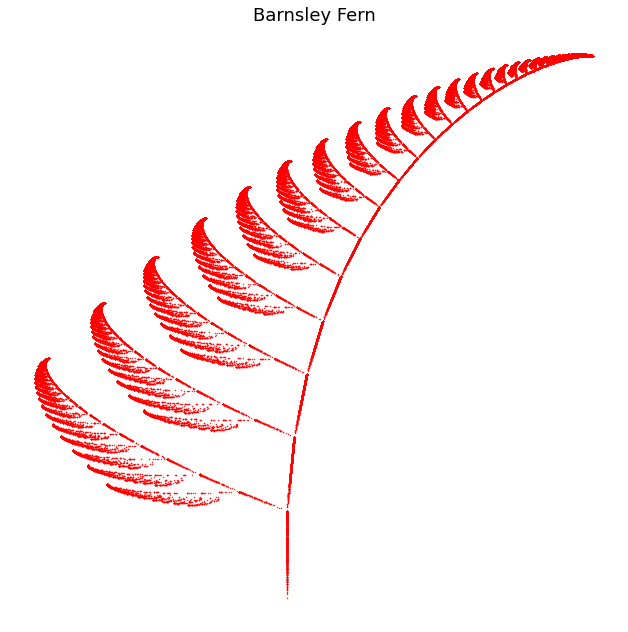

In [5]:
fig, ax = plt.subplots(1,1,figsize=(11,11))
plt.title('Barnsley Fern', size=18)
plt.scatter(x1, y1, s = 0.2, c = 'red') 
plt.axis("off")
plt.show()

In [6]:
x2 = [0]
y2 = [0]

for i in range(0, 200000): 
  
    p = randint(1, 93) # 93) 
      
    if p == 1:                                        # Stem  (0.01)
        x2.append(0) 
        y2.append(0.16*(y2[i])) 
         
    if p >= 2 and p <= 86:                            # Successively smaller leaflets  (0.85)
        x2.append(0.85*(x2[i]) + 0.04*(y2[i])) 
        y2.append(-0.04*(x2[i]) + 0.85*(y2[i])+1.6) 

    if p >= 87 and p <= 93:                           # Largest left-hand leaflet  (0.07)
        #x1.append(0.2*(x1[i]) - 0.26*(y1[i])) 
        #y1.append(0.23*(x1[i]) + 0.22*(y1[i])+1.6) 
        x2.append(-0.15*(x2[i]) + 0.28*(y2[i]))       # Largest right-hand leaflet (0.07)
        y2.append(0.26*(x2[i]) + 0.24*(y2[i])+0.44)

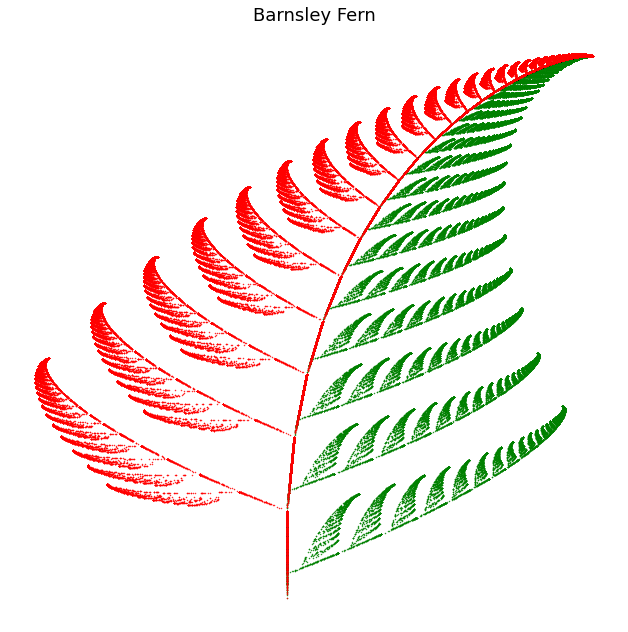

In [7]:
fig, ax = plt.subplots(1,1,figsize=(11,11))
plt.title('Barnsley Fern', size=18)
plt.scatter(x2, y2, s = 0.2, c = 'green') 
plt.scatter(x1, y1, s = 0.2, c = 'red') 
plt.axis("off")
plt.show()

 ## Mutant variants
 
One experimenter has come up with a table of coefficients to produce another remarkably naturally looking fern however, resembling the Cyclosorus or Thelypteridaceae fern, or playing with the coefficients, it is possible to create mutant fern varieties.
 
 
 (https://coolbutuseless.github.io/2018/07/07/barnsley-ferns-fractal)
 
 4 Transformations i.e.` p(n+1) = A * p(n) + a` 

In [8]:
x = [0]
y = [0]

A = [0, 0, 0, 0.25]
a = [0, -0.4]
pa = 0.02

B = [0.95,  0.005, -0.005, 0.93]
b = [-0.002, 0.5]
pb = 0.84


C = [0.035, -0.2,  0.16, 0.04]
c = [-0.09, 0.02]
pc = 0.07

D = [-0.04,  0.2,  0.16, 0.04]
d = [ 0.083,  0.12]
pd = 0.07

In [9]:
for i in range(0, 20000): 
  
    p = randint(1, 100) 
      
    if p <= 2:                                       
        x.append(A[0]*x[i] + A[1]*y[i] + a[0])
        y.append(A[2]*x[i] + A[3]*y[i] + a[1])
         
    if p >= 3 and p <= 86:                             
        x.append(B[0]*x[i] + B[1]*y[i] + b[0])
        y.append(B[2]*x[i] + B[3]*y[i] + b[1])
      
    if p >= 87 and p <= 93:                          
        x.append(C[0]*x[i] + C[1]*y[i] + c[0])
        y.append(C[2]*x[i] + C[3]*y[i] + c[1])
          
    if p >= 94 and p <= 100:                        
        x.append(D[0]*x[i] + D[1]*y[i] + d[0])
        y.append(D[2]*x[i] + D[3]*y[i] + d[1])
        

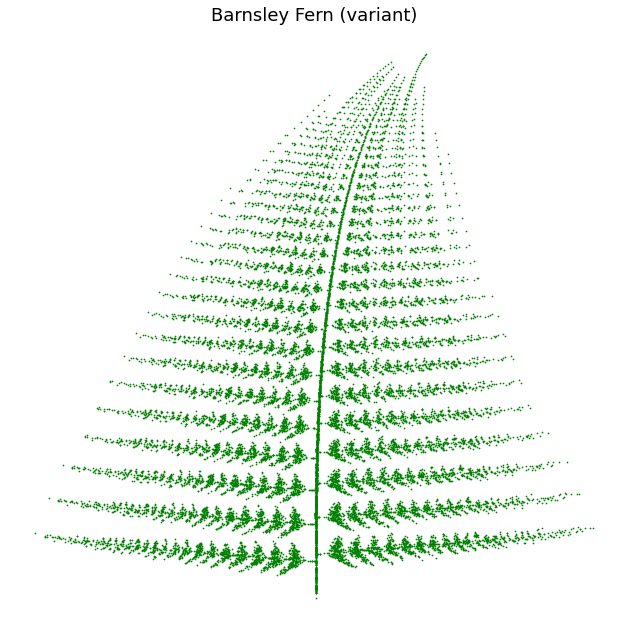

CPU times: user 115 ms, sys: 12.1 ms, total: 127 ms
Wall time: 126 ms


In [10]:
%%time

fig, ax = plt.subplots(1,1,figsize=(11,11))
plt.title('Barnsley Fern (variant)', size=18)
plt.scatter(x, y, s = 0.5, c = 'green') 
plt.axis("off")
plt.show()